In [24]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
#import requests
#import os
import glob
##import re
#import sys
#import datetime
#from datetime import timedelta
#from io import StringIO
#from bs4 import BeautifulSoup

# Local import 
# > Make sure SIO_wrap dir is on the same path as this script.
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from SIO_wrap import dir_tree, fnames

from setdir import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Save drifter data (one netcdf per drifter) 

[National Centers for Environmental Information (NOAA/NCEI) NetCDF Trajectory Template version 2](https://www.nodc.noaa.gov/data/formats/netcdf/v2.0/#keyprinciples)
"""
netcdf NCEI_Trajectory_Incomplete {
dimensions:
       obs = <dim1>;
       trajectory = <dim2>;
variables:
        int trajectory(trajectory); //....................................... RECOMMENDED - If using the attribute below: cf_role. Data type can be whatever is appropriate for the unique feature type.
                trajectory:long_name = "Unique identifier for each feature instance"; //................................ RECOMMENDED
                trajectory:cf_role = "trajectory_id"; //..................... RECOMMENDED
        double time(trajectory,obs) ;//........................................ Depending on the precision used for the variable, the data type could be int or double instead of float.
                time:long_name = "" ; //..................................... RECOMMENDED - Provide a descriptive, long name for this variable. 
                time:standard_name = "time" ; //............................. REQUIRED    - Do not change
                time:units = "seconds since 1970-01-01 00:00:00 0:00" ; //... REQUIRED    - Use approved CF convention with approved UDUNITS.
                time:calendar = "julian" ; //................................ REQUIRED    - IF the calendar is not default calendar, which is "gregorian".
                time:axis = "T" ; //......................................... REQUIRED    - Do not change.
                time:_FillValue = 0.0f;//.................................... REQUIRED  if there could be missing values in the data.
                time:ancillary_variables = "" ; //........................... RECOMMENDED - List other variables providing information about this variable.
                time:comment = "" ; //....................................... RECOMMENDED - Add useful, additional information here.  
        float lat(trajectory,obs) ;//....................................... Depending on the precision used for the variable, the data type could be int or double instead of float. 
                lat:long_name = "" ; //...................................... RECOMMENDED - Provide a descriptive, long name for this variable.
                lat:standard_name = "latitude" ; //.......................... REQUIRED    - Do not change.
                lat:units = "degrees_north" ; //............................. REQUIRED    - CF recommends degrees_north, but at least must use UDUNITS.
                lat:axis = "Y" ; //.......................................... REQUIRED    - Do not change.
                lat:valid_min = 0.0f ; //.................................... RECOMMENDED - Replace with correct value.
                lat:valid_max = 0.0f ; //.................................... RECOMMENDED - Replace with correct value.
                lat:_FillValue = 0.0f;//..................................... REQUIRED  if there could be missing values in the data.
                lat:ancillary_variables = "" ; //............................ RECOMMENDED - List other variables providing information about this variable.
                lat:comment = "" ; //........................................ RECOMMENDED - Add useful, additional information here.
       float lon(trajectory,obs) ; //........................................ Depending on the precision used for the variable, the data type could be int or double instead of float. 
                lon:long_name = "" ; //...................................... RECOMMENDED
                lon:standard_name = "longitude" ; //......................... REQUIRED    - This is fixed, do not change.
                lon:units = "degrees_east" ; //.............................. REQUIRED    - CF recommends degrees_east, but at least use UDUNITS.
                lon:axis = "X" ; //.......................................... REQUIRED    - Do not change.
                lon:valid_min = 0.0f ; //.................................... RECOMMENDED - Replace this with correct value.
                lon:valid_max = 0.0f ; //.................................... RECOMMENDED - Replace this with correct value.
                lon:_FillValue = 0.0f;//..................................... REQUIRED  if there could be missing values in the data.    
                lon:ancillary_variables = "" ; //............................ RECOMMENDED - List other variables providing information about this variable.
                lon:comment = "" ; //........................................ RECOMMENDED - Add useful, additional information here.
        float z(trajectory,obs) ;//........................................ Depending on the precision used for the variable, the data type could be int or double instead of float. Also the variable "z" could be substituted with a more descriptive name like "depth", "altitude", "pressure", etc.
                z:long_name = "" ; //........................................ RECOMMENDED - Provide a descriptive, long name for this variable. 
                z:standard_name = "" ; //.................................... REQUIRED    - Usually "depth" or "altitude" is used.
                z:units = "" ; //............................................ REQUIRED    - Use UDUNITS.
                z:axis = "Z" ; //............................................ REQUIRED    - Do not change.
                z:positive = "" ; //......................................... REQUIRED    - Use "up" or "down".
                z:valid_min = 0.0f ; //...................................... RECOMMENDED - Replace with correct value.
                z:valid_max = 0.0f ; //...................................... RECOMMENDED - Replace with correct value.
                z:_FillValue = 0.0f;//....................................... REQUIRED  if there could be missing values in the data.
                z:ancillary_variables = "" ; //.............................. RECOMMENDED - List other variables providing information about this variable.
                z:comment = "" ; //.......................................... RECOMMENDED - Add useful, additional information here.
        float geophysical_variable_1(trajectory,obs) ;//................................ This is an example of how each and every geophysical variable in the file should be represented. Replace the name of the variable("geophysical_variable_1") with a suitable name. Replace "float" by data type which is appropriate for the variable. 
                geophysical_variable_1:long_name = "" ; //................... RECOMMENDED - Provide a descriptive, long name for this variable. 
                geophysical_variable_1:standard_name = "" ; //............... REQUIRED    - If using a CF standard name and a suitable name exists in the CF standard name table.
                geophysical_variable_1:ncei_name = "" ; //................... RECOMMENDED - From the NCEI variables vocabulary, if standard_name does not exist.
                geophysical_variable_1:units = "" ; //....................... REQUIRED    - Use UDUNITS compatible units.
                geophysical_variable_1:scale_factor = 0.0f ; //.............. REQUIRED if the data uses a scale_factor other than 1.The data type should be the data type of the variable.
                geophysical_variable_1:add_offset = 0.0f ; // ............... REQUIRED if the data uses an add_offset other than 0. The data type should be the data type of the variable.
                geophysical_variable_1:_FillValue = 0.0f ; //................ REQUIRED  if there could be undefined values in the data.
geophysical_variable_1:missing_value = 0.0f ; //................ RECOMMENDED  if there could be missing values in the data. Not necessary if there is only one value which is the same as _FillValue.
                geophysical_variable_1:valid_min = 0.0f ; //................. RECOMMENDED - Replace with correct value.
                geophysical_variable_1:valid_max = 0.0f ; //................. RECOMMENDED - Replace with correct value.
                geophysical_variable_1:coordinates = "time lat lon z" ; //... REQUIRED    - Include the auxiliary coordinate variables and optionally coordinate variables in the list. The order itself does not matter. Also, note that whenever any auxiliary coordinate variable contains a missing value, all other coordinate, auxiliary coordinate and data values corresponding to that element should also contain missing values.
geophysical_variable_1:coverage_content_type = "" ; // .... RECOMMENDED - An ISO 19115-1 code to indicate the source of the data (image, thematicClassification, physicalMeasurement, auxiliaryInformation, qualityInformation, referenceInformation, modelResult, or coordinate). (ACDD)
                geophysical_variable_1:grid_mapping = "crs" ; //............. RECOMMENDED - It is highly recommended that the data provider put the data in a well known geographic coordinate system and provide the details of the coordinate system.
                geophysical_variable_1:source = "" ; //...................... RECOMMENDED - The method of production of the original data
                geophysical_variable_1:references = "" ; //.................. RECOMMENDED - Published or web-based references that describe the data or methods used to produce it.
                geophysical_variable_1: cell_methods = "" ; // .............. RECOMMENDED - Use the coordinate variables to define the cell values (ex., "time: point lon: point lat: point z: point").
                geophysical_variable_1:ancillary_variables = "instrument_parameter_variable platform_variable boolean_flag_variable enumerated_flag_variable" ; //......... RECOMMENDED - Identify the variable name(s) of the flag(s) and other ancillary variables relevant to this variable.  Use a space-separated list.
                geophysical_variable_1:platform = "platform_variable" ; //... RECOMMENDED - Refers to name of variable containing information on the platform from which this variable was collected.
                geophysical_variable_1:instrument = "instrument_variable";//..RECOMMENDED - Refers to name of variable containing information on the instrument from which this variable was collected.
                geophysical_variable_1:comment = "" ; //..................... RECOMMENDED - Add useful, additional information here.
        byte boolean_flag_variable(trajectory,obs); //............................. A boolean flag variable, in which each bit of the flag can be a 1 or 0.
                boolean_flag_variable:standard_name= "" ; //................. RECOMMENDED - This attribute should include the standard name of the variable which this flag contributes plus the modifier: "status_flag" (for example, "sea_water_temperature status_flag"). See CF standard name modifiers.
                boolean_flag_variable:long_name = "" ; //.................... RECOMMENDED - Provide a descriptive, long name for this variable. 
                boolean_flag_variable:flag_masks ="" ; //...................... REQUIRED    - Provide a comma-separated list describing the binary condition of the flags. 
                boolean_flag_variable:flag_meanings = "" ; //................ REQUIRED    - Provide a comma-separated list of flag values that map to the flag_masks.
                boolean_flag_variable:references = "" ; //................... RECOMMENDED - Published or web-based references that describe the data or methods used to produce it.
                boolean_flag_variable:comment = "" ; //...................... RECOMMENDED - Add useful, additional information here.
        int enumerated_flag_variable(trajectory,obs);  //...................... An enumerated flag variable, in which numeric values refer to defined, exclusive conditions.
                enumerated_flag_variable:standard_name= "" ; //.............. RECOMMENDED - This attribute should include the standard name of the variable which this flag contributes plus the modifier: "status_flag" (for example, "sea_water_temperature status_flag"). See CF standard name modifiers.
                enumerated_flag_variable:long_name = "" ; //................. RECOMMENDED - Provide a descriptive, long name for this variable. 
                enumerated_flag_variable:flag_values = ; //.................. REQUIRED    - Provide a comma-separated list of flag values that map to the flag_meanings.
                enumerated_flag_variable:flag_meanings = "" ; //............. REQUIRED    - Provide a space-separated list of meanings corresponding to each of the flag_values
                enumerated_flag_variable:references = "" ; //................ RECOMMENDED - Published or web-based references that describe the data or methods used to produce it.
                enumerated_flag_variable:comment = "" ; //................... RECOMMENDED - Add useful, additional information here.
        int platform_variable; //............................................ RECOMMENDED - a container variable storing information about the platform. If more than one, can expand each attribute into a variable. For example, platform_call_sign and platform_ncei_code. See instrument_parameter_variable for an example.
                platform_variable:long_name = "" ; //........................ RECOMMENDED - Provide a descriptive, long name for this variable. 
                platform_variable:comment = "" ; //.......................... RECOMMENDED - Add useful, additional information here.
                platform_variable:call_sign = "" ; //........................ RECOMMENDED - This attribute identifies the call sign of the platform.          
                platform_variable:ncei_code = ""; //......................... RECOMMENDED - This attribute identifies the NCEI code of the platform. Look at http://www.nodc.noaa.gov/cgi-bin/OAS/prd/platform to find if NCEI codes are available.          
                platform_variable:wmo_code = "";//........................... RECOMMENDED - This attribute identifies the wmo code of the platform. Information on getting WMO codes is available at http://www.wmo.int/pages/prog/amp/mmop/wmo-number-rules.html          
                platform_variable:imo_code  = "";//.......................... RECOMMENDED - This attribute identifies the International Maritime Organization (IMO) number assigned by Lloyd's register. 
        int instrument_parameter_variable(trajectory); //.................... RECOMMENDED - an instrument variable storing information about a parameter of the instrument used in the measurement, the dimensions don't have to be specified if the same instrument is used for all the measurements.
                instrument_parameter_variable:long_name = "" ; //............ RECOMMENDED - Provide a descriptive, long name for this variable. 
                instrument_parameter_variable:comment = "" ; //.............. RECOMMENDED - Add useful, additional information here.
        double crs; //.......................................................... RECOMMENDED - A container variable storing information about the grid_mapping. All the attributes within a grid_mapping variable are described in http://cfconventions.org/Data/cf-conventions/cf-conventions-1.6/build/cf-conventions.html#grid-mappings-and-projections. For all the measurements based on WSG84, the default coordinate system used for GPS measurements, the values shown here should be used.
                crs:grid_mapping_name = "latitude_longitude"; //............. RECOMMENDED
                crs:epsg_code = "EPSG:4326" ; //............................. RECOMMENDED - European Petroleum Survey Group code for the grid mapping name.
                crs:semi_major_axis = 6378137.0d ; //......................... RECOMMENDED
                crs:inverse_flattening = 298.257223563d ; //.................. RECOMMENDED


// global attributes:
        :ncei_template_version = "NCEI_NetCDF_Trajectory_Template_v2.0" ; //............. REQUIRED (NCEI)
        :featureType = "trajectory" ; //.................................. REQUIRED - CF attribute for identifying the featureType. (CF)


        :title = "" ; //............................................................... HIGHLY RECOMMENDED - Provide a useful title for the data in the file. (ACDD)
        :summary = "" ; //....................................................... HIGHLY RECOMMENDED - Provide a useful summary or abstract for the data in the file. (ACDD)
        :keywords = "" ; //...................................................... HIGHLY RECOMMENDED - A comma separated list of keywords coming from the keywords_vocabulary. (ACDD)
        :Conventions = "CF-1.6, ACDD-1.3" ; //.................................................. HIGHLY RECOMMENDED    - A comma separated list of the conventions being followed. Always try to use latest version. (CF/ACDD)
       :id = "" ; //.................................................................... RECOMMENDED - Should be a human readable unique identifier for data set. (ACDD)
       :naming_authority = "" ; //........................................... RECOMMENDED - Backward URL of institution (for example, gov.noaa.ncei). (ACDD)
       :history = "" ; //............................................................ RECOMMENDED - Provides an audit trail for modifications to the original data. (ACDD)
       :source = "" ; //............................................................. RECOMMENDED - The method of production of the original data. (CF)
       :processing_level = "" ; //............................................. RECOMMENDED - Provide a description of the processing or quality control level of the data. (ACDD)
       :comment = "" ; //........................................................ RECOMMENDED - Provide useful additional information here. (CF)
       :acknowledgment = "" ; //............................................ RECOMMENDED - A place to acknowledge various types of support for the project that produced this data. (ACDD)
       :license = "" ; //............................................................ RECOMMENDED - Describe the restrictions to data access and distribution. (ACDD)
       :standard_name_vocabulary = "CF Standard Name Table vNN" ; //........ RECOMMENDED   - If using CF standard name attribute for variables. Replace NN with the CF standard name table number  (CF)
       :date_created = "" ; //.................................................. RECOMMENDED - Creation date of this version of the data(netCDF).  Use ISO 8601:2004 for date and time. (ACDD)
       :creator_name = "" ; //................................................. RECOMMENDED - The name of the person (or other creator type specified by the creator_type attribute) principally responsible for creating this data. (ACDD)
       :creator_email = "" ; //................................................. RECOMMENDED - The email address of the person (or other creator type specified by the creator_type attribute) principally responsible for creating this data. (ACDD)
       :creator_url = "" ; //...................................................... RECOMMENDED - The URL of the person (or other creator type specified by the creator_type attribute) principally responsible for creating this data. (ACDD)
       :institution = "" ; //....................................................... RECOMMENDED -The name of the institution principally responsible for originating this data..  An institution attribute can be used for each variable if variables come from more than one institution. (CF/ACDD)
       :project = "" ; //............................................................ RECOMMENDED - The name of the project(s) principally responsible for originating this data. Multiple projects can be separated by commas. (ACDD)
       :publisher_name = "" ; //.............................................. RECOMMENDED - The name of the person (or other entity specified by the publisher_type attribute) responsible for publishing the data file or product to users, with its current metadata and format. (ACDD)
       :publisher_email = "" ; //.............................................. RECOMMENDED - The email address of the person (or other entity specified by the publisher_type attribute) responsible for publishing the data file or product to users, with its current metadata and format. (ACDD)
       :publisher_url = "" ; //................................................... RECOMMENDED - The URL of the person (or other entity specified by the publisher_type attribute) responsible for publishing the data file or product to users, with its current metadata and format. (ACDD)
       :geospatial_bounds = "" ; //...........................................RECOMMENDED - Describes the data's 2D or 3D geospatial extent in OGC's Well-Known Text (WKT) Geometry format. (ACDD)
       :geospatial_bounds_crs = "" ; //.....................................RECOMMENDED - The coordinate reference system (CRS) of the point coordinates in the geospatial_bounds attribute. (ACDD)
       :geospatial_bounds_vertical_crs = "" ; //........................RECOMMENDED - The vertical coordinate reference system (CRS) for the Z axis of the point coordinates in the geospatial_bounds attribute. (ACDD)
       :geospatial_lat_min = 0.0d ; //.......................................... RECOMMENDED - Describes a simple lower latitude limit. (ACDD)
       :geospatial_lat_max = 0.0d ; //......................................... RECOMMENDED - Describes a simple upper latitude limit. (ACDD)
       :geospatial_lon_min = 0.0d ; //......................................... RECOMMENDED - Describes a simple lower longitude limit. (ACDD)
       :geospatial_lon_max = 0.0d ; //........................................ RECOMMENDED - Describes a simple upper longitude limit. (ACDD)
       :geospatial_vertical_min = 0.0d ; //.................................. RECOMMENDED - Describes the numerically smaller vertical limit. (ACDD)
       :geospatial_vertical_max = 0.0d ; //.................................. RECOMMENDED - Describes the numerically larger vertical limit. (ACDD)
       :geospatial_vertical_positive = "" ; //............................ RECOMMENDED - Use "up" or "down". (ACDD)
       :time_coverage_start = "" ; //........................................ RECOMMENDED - Describes the time of the first data point in the data set. Use ISO 8601:2004 for date and time. (ACDD)
       :time_coverage_end = "" ; //......................................... RECOMMENDED - Describes the time of the last data point in the data set. Use ISO 8601:2004 for date and time.(ACDD)
       :time_coverage_duration = "" ; //.................................. RECOMMENDED - Describes the duration of the data set. Use ISO 8601:2004 for date and time. (ACDD)
       :time_coverage_resolution = "" ; //............................... RECOMMENDED - Describes the targeted time period between each value in the data set. Use ISO 8601:2004 for date and time. (ACDD)
       :uuid = "" ; //................................................................. RECOMMENDED - Machine readable unique identifier for each file. A new uuid is created whenever the file is changed. (NCEI)
       :sea_name = "" ; //........................................................ RECOMMENDED - The names of the sea in which the data were collected. Use NCEI sea names table. (NCEI)
     
       :creator_type = "" ; //.................................................... SUGGESTED - Specifies type of creator with one of the following: 'person', 'group', 'institution', or 'position'. (ACDD)
       :creator_institution = "" ; //........................................... SUGGESTED - The institution of the creator; should uniquely identify the creator's institution. (ACDD)
       :publisher_type = "" ; //................................................ SUGGESTED - Specifies type of publisher with one of the following: 'person', 'group', 'institution', or 'position'. (ACDD)
       :publisher_institution = "" ; //....................................... SUGGESTED - The institution that presented the data file or equivalent product to users; should uniquely identify the institution. (ACDD)
       :program = "" ; //........................................................... SUGGESTED - The overarching program(s) of which the dataset is a part. (ACDD)
       :contributor_name = "" ; //............................................ SUGGESTED - The name of any individuals, projects, or institutions that contributed to the creation of this data. (ACDD)
       :contributor_role = "" ; //............................................... SUGGESTED - The role of any individuals, projects, or institutions that contributed to the creation of this data. (ACDD)
       :geospatial_lat_units = "degrees_north" ; //..................  SUGGESTED - Units for the latitude axis described in "geospatial_lat_min" and "geospatial_lat_max" attributes. Use UDUNITS compatible units. (ACDD)
       :geospatial_lon_units = "degrees_east"; //..................... SUGGESTED - Units for the longitude axis described in "geospatial_lon_min" and "geospatial_lon_max" attributes. Use UDUNITS compatible units. (ACDD)
       :geospatial_vertical_units = "" ; //.................................. SUGGESTED - Units for the vertical axis described in "geospatial_vertical_min" and "geospatial_vertical_max" attributes. The default is EPSG:4979. (ACDD)
       :date_modified = "" ; //.................................................. SUGGESTED - The date on which the data was last modified. Note that this applies just to the data, not the metadata. Use ISO 8601:2004 for date and time. (ACDD)
       :date_issued = "" ; //...................................................... SUGGESTED - The date on which this data (including all modifications) was formally issued (i.e., made available to a wider audience). Note that these apply just to the data, not the metadata. Use ISO 8601:2004 for date and time. (ACDD)
       :date_metadata_modified = "" ; //................................. SUGGESTED - The date on which the metadata was last modified. Use ISO 8601:2004 for date and time. (ACDD)
       :product_version = "" ; //............................................... SUGGESTED - Version identifier of the data file or product as assigned by the data creator. (ACDD)
       :keywords_vocabulary = "" ; //....................................... SUGGESTED - Identifies the controlled keyword vocabulary used to specify the values within the attribute "keywords". Example: 'GCMD:GCMD Keywords' ACDD)
       :platform = "" ; //........................................................... SUGGESTED - Name of the platform(s) that supported the sensor data used to create this data set or product. Platforms can be of any type, including satellite, ship, station, aircraft or other. (ACDD)
       :platform_vocabulary = "" ; //......................................... SUGGESTED - Controlled vocabulary for the names used in the "platform" attribute. Example: ‘NASA/GCMD Platform Keywords Version 8.1’ (ACDD)
       :instrument = "" ; //........................................................ SUGGESTED - Name of the contributing instrument(s) or sensor(s) used to create this data set or product. (ACDD)
       :instrument_vocabulary = "" ; //..................................... SUGGESTED - Controlled vocabulary for the names used in the "instrument" attribute. Example: ‘NASA/GCMD Instrument Keywords Version 8.1’ (ACDD)
       :cdm_data_type = "Trajectory" ; //...................................... SUGGESTED - The data type, as derived from Unidata's Common Data Model Scientific Data types and understood by THREDDS. (ACDD)
       :metadata_link = "" ; //................................................... SUGGESTED - A URL that gives the location of more complete metadata. A persistent URL is recommended for this attribute. (ACDD)
       :references = "" ; //.........................................................SUGGESTED - Published or web-based references that describe the data or methods used to produce it. Recommend URIs (such as a URL or DOI) for papers or other references. (CF) 
       
      
}"""

In [8]:
fname = cat_aux_path('NCEI_trajectory_template_v2.0_2016-09-22_181833.673833.nc')


In [9]:
ds_gold = xr.open_dataset(fname)


/opt/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'sal' has multiple fill values {-8888.0, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'temp' has multiple fill values {-8888.0, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [12]:
ds_gold

<xarray.Dataset>
Dimensions:      (trajectory: 1, obs: 10)
Coordinates:
  * trajectory   (trajectory) int32 -2147483647
    time         (trajectory, obs) object 2015-03-25 22:23:38 ... 2015-03-25 ...
    lat          (trajectory, obs) float64 37.92 37.62 37.13 ... 37.15 37.88
    lon          (trajectory, obs) float64 -123.8 -123.6 ... -123.9 -123.9
    z            (trajectory, obs) float64 1.5 1.5 1.5 1.5 ... 1.5 1.5 1.5 1.5
Dimensions without coordinates: obs
Data variables:
    sal          (trajectory, obs) float64 33.71 33.82 33.51 ... 33.25 33.54
    temp         (trajectory, obs) float64 13.18 13.25 13.15 ... 13.56 13.17
    instrument1  |S1 b''
    platform1    |S1 b''
    crs          float64 9.969e+36
Attributes: (12/65)
    instrument:                      In Situ/Laboratory Instruments > Profile...
    platform:                        In Situ Ocean-based Platforms > SHIPS
    title:                           Oceanographic and surface meteorological...
    ncei_template_version:           NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:                     CF-1.6, ACDD-1.3
    naming_authority:                gov.noaa.ncei
    ...                              ...
    publisher_name:                  NCEI Data Manager
    publisher_email:                 ncei.ioos@noaa.gov
    publisher_url:                   http://www.ncei.noaa.gov/
    license:                         Freely available
    time_coverage_duration:          PT1M30S
    history:                         Tue Sep 27 16:40:22 2016: ncatted -a tim...

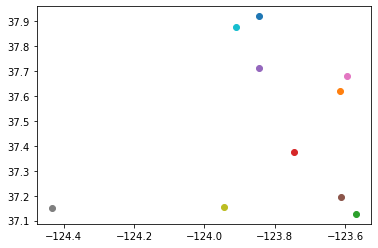

In [17]:
plt.plot(ds_gold.lon, ds_gold.lat, marker='o')

In [21]:
###################-----------   USER EDITS    ------------###################

# Path where data are saved. Can be changed in file SIO_wrap/dir_tree.py
data_dir = dir_tree.dir_out

# Download start date must have format yyyy-mm-dd. Default is set to the
# beginning of the TERIFIC project, i.e 2019-12-04.
download_start_date = "2019-12-04"
print("\nDefault download start date: %s\n" % download_start_date)


# SIO username and password
username = "uk-noc"
password = "noc-drifter"

# URL for data
base_url = "https://gdp.ucsd.edu/cgi-bin/projects/uk-noc/drifter.py?" 

# Options

#full_url = base_url+tstr+pidstr
#download_url = ("https://gdp.ucsd.edu/cgi-bin/projects/uk-noc/"
#                "drifter.py?start_date=") 


# String formatting for time for:
#   - the download url, 
#   - appending to the filename
# 	- the data time column, respectively.
url_strftime = '%Y-%m-%d'
tstamp_strftime = '%Y%m%d'
timcol_strftime = '%Y-%m-%d %H:%M:%S'




Default download start date: 2019-12-04



In [22]:
# Get the list of Platform IDs
PID = pd.read_csv(cat_proc_path('PID_list.txt'), header='infer', index_col=0)


In [29]:
# Try saving a single data file in the appropriate format
i = 0    
# Get a single platform ID from the full list
pid1 = (PID["PID"].values)[i].astype('str')
PID1 = (PID["PID"].values)[i]


fname = 'pid'+str(PID1)+'_*'
hourly_files = glob.glob(cat_interim_path(fname))
hourly_files = sorted(hourly_files)
# Find the most recent file (alphabetically, rather than by time)
hourly_files = hourly_files[-1]
    
ds_hourly = xr.open_dataset(hourly_files)
ds_hourly


<xarray.Dataset>
Dimensions:             (time: 4505)
Coordinates:
  * time                (time) datetime64[ns] 2019-12-04T23:00:00 ... 2020-06...
Data variables: (12/16)
    GPS_NumSat          (time) float64 ...
    GPS_HDOP            (time) float64 ...
    Battery_volts       (time) float64 ...
    vvel                (time) float64 ...
    SBD_Retries         (time) float64 ...
    Drogue_cnts         (time) float64 ...
    ...                  ...
    uvel                (time) float64 ...
    SBD_Transmit_Delay  (time) float64 ...
    GPS_Latitude_deg    (time) float64 ...
    SLP_mB              (time) float64 ...
    GPS_Longitude_deg   (time) float64 ...
    time_seconds        (time) float64 ...
Attributes:
    Platform_ID:   300234066519040
    End Time:      2020-06-09T15:00:00
    Project:       TERIFIC
    Originator:    EFW
    Institution:   National Oceanography Centre, UK
    Date created:  2022-01-12
    Processing:    Flagged GPS out of LabSea, ran Lowess filter with poly_ord...

In [79]:
# Assign dimensions of obs = <dim1>, trajectory = <dim2>
latname = 'GPS_Latitude_deg'
lonname = 'GPS_Longitude_deg'
time = ds_hourly.time.values
lat = ds_hourly[latname].values
lon = ds_hourly[lonname].values

time = time[np.newaxis, :]
time.shape
lat = lat[np.newaxis, :]
lat.shape
lon = lon[np.newaxis, :]

sst1 = ds_hourly.SST_degC.values
sst1 = sst1[np.newaxis, :]


# Coordinates where trajectory is the platform ID, and obs are the individual 
# (hourly) observations
mycoords = dict(
    trajectory=(["trajectory"], [PID1]),
    time=(["trajectory", "obs"], time),
    lat=(["trajectory", "obs"], lat),
    lon=(["trajectory", "obs"], lon),
#    z=(["trajectory", "obs"], time),
)

# Data variables
myvars = dict(
    SST = (["trajectory", "obs"], sst1, 
           dict(long_name = 'sea_surface_temperature',
               units = 'deg C',
               _FillValue = -999)),
)

# Attributes
myattrs = dict(
    ncei_template_version = "NCEI_NetCDF_Trajectory_Template_v2.0",
    featureType = "trajectory",
    instrument = 'Surface velocity profiler (SVP)',
    platform = 'Surface drifter',
    title = "TERIFIC drifters: Deployed in the subpolar North Atlantic between 2019-12-05 and 2021-10-01",
    keywords = "SVP drifters, SVPB drifters",
    Conventions = 'CF-1.6, ACDD-1.3',
    id = 'To be populated with a DOI',
    naming_authority = 'gov.noaa.ncei',
    processing_level = "Filtered and hourly-interpolated",
    acknowledgment = "Funded by the European Union, Horizon 2020: European Research Council Starting Grant",
    date_created = datetime.datetime.today().strftime(url_strftime),
    creator_name = 'Eleanor Frajka-Williams',
    creator_email = 'eleanor.frajka@noc.ac.uk',
    creator_url = 'http://eleanorfrajka.com',
    institution = "National Oceanography Centre, UK",
    project = "Targeted Experiment to Reconcile Increased Freshwater with Increased Convection (TERIFIC)",
    time_coverage_start = '2019-12-05',
    time_coverage_end = '2022-01-11',
    time_coverage_resolution = 'hourly',
    creator_type = 'person',
    platform = 'Surface Velocity Profiler',
    sea_name = 'Atlantic',
)

blank = xr.Dataset(data_vars=myvars, coords=mycoords, attrs=myattrs)
blank
# ds_qc["flag"] = ('time', good_flagval * np.ones(ds_qc.time.shape, 
#                                                     dtype=np.int8))



<xarray.Dataset>
Dimensions:     (trajectory: 1, obs: 4505)
Coordinates:
  * trajectory  (trajectory) int64 300234066519040
    time        (trajectory, obs) datetime64[ns] 2019-12-04T23:00:00 ... 2020...
    lat         (trajectory, obs) float64 59.96 59.97 59.97 ... 61.08 61.06
    lon         (trajectory, obs) float64 -47.37 -47.39 -47.42 ... -60.67 -60.7
Dimensions without coordinates: obs
Data variables:
    SST         (trajectory, obs) float64 5.88 5.86 5.832 ... 3.19 3.22 3.25
Attributes: (12/21)
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    featureType:               trajectory
    title:                     TERIFIC drifters
    keywords:                  SVP drifters, SVPB drifters
    Conventions:               CF-1.6, ACDD-1.3
    id:                        To be populated with a DOI
    ...                        ...
    time_coverage_start:       2019-12-05
    time_coverage_end:         2022-01-11
    time_coverage_resolution:  hourly
    creator_type:              person
    platform:                  Surface Velocity Profiler
    sea_name:                  Atlantic

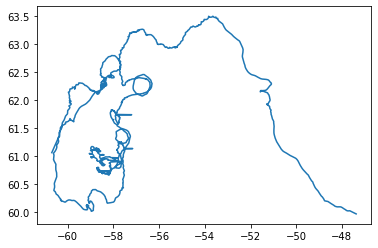

(4505,)

In [94]:
plt.plot(blank.lon[0,:],blank.lat[0,:])
plt.show()

#lon1 = blank.lon.transpose()
#lon1.shape
#lat1 = blank.lat.transpose()
#plt.plot(lon1,lat1)

lon1 = blank.lon[0,:]
lon1.shape

In [45]:
np.random.seed(0)
temperature = 15 + 8 * np.random.randn(2, 2, 3)
precipitation = 10 * np.random.rand(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]
time = pd.date_range("2014-09-06", periods=3)
reference_time = pd.Timestamp("2014-09-05")
coords=dict(
    lon=(["x", "y"], lon),
    lat=(["x", "y"], lat),
    time=time,
    reference_time=reference_time,
)
data_vars=dict(
    temperature=(["x", "y", "time"], temperature),
    precipitation=(["x", "y", "time"], precipitation),
)

data_vars

<xarray.Dataset>
Dimensions:     (trajectory: 1)
Coordinates:
  * trajectory  (trajectory) int64 300234066519040
Data variables:
    *empty*

In [9]:
# Loop through the list of Platform IDs of drifters that need to be updated
# 
counter = 0
for i in range(len(PID_to_update)):
    counter += 1


    
    PID1 = PID_to_update[i]
    pid1 = PID1.astype('str')
    
    # Load data into an xarray
    ds = load_one_drifter(pid1, base_url, username, password,
                               download_start_date)
    
    
    # Get values for attributes
    dstr = datetime.datetime.today()
    dstr = dstr.replace(hour=0, minute=0, second=0, 
                        microsecond=0).strftime('%Y-%m-%d')

    maxtime = ds.time.max().values
    maxtimestr = pd.to_datetime(maxtime).strftime('%Y-%m-%dT%H:%M:%S')


    project_name = 'TERIFIC'
    operator_name = "EFW"
    institution_name = 'National Oceanography Centre, UK'


    # Create a dictionary of attributes
    attr_dict = {"Platform_ID": PID1,
                 "End Time": maxtimestr,
                 "Project": project_name,
                 "Originator": operator_name,
                 "Institution": institution_name,
                 "Date created": dstr,
                }


    ds = ds.assign_attrs(attr_dict)

    ds = ds.drop('Platform_ID')
    
    # Sort by time ascending
    ds = ds.sortby('time', ascending=True)



    # Save file to raw - only if it doesn't already exist
    enddate = pd.to_datetime(maxtime).strftime('%Y%m%d')
    fname = 'pid'+str(PID1)+'_'+enddate+'.nc'
    
    outfile_with_path = cat_raw_path(fname)
    if not os.path.isfile(outfile_with_path):
        print(str(counter)+'. '+outfile_with_path)
        ds.to_netcdf(cat_raw_path(fname))
    else:
        print(str(counter)+'. '+outfile_with_path+' already exists!')



1. ../01-data/01-raw/pid300234068342280_20220111.nc already exists!
2. ../01-data/01-raw/pid300234068343310_20220111.nc already exists!
3. ../01-data/01-raw/pid300234068342290_20220111.nc already exists!
4. ../01-data/01-raw/pid300234068343830_20220111.nc already exists!
5. ../01-data/01-raw/pid300234068242460_20220111.nc already exists!
6. ../01-data/01-raw/pid300234068342820_20220111.nc already exists!
7. ../01-data/01-raw/pid300234066517030_20220111.nc
8. ../01-data/01-raw/pid300234068342840_20220111.nc
9. ../01-data/01-raw/pid300234068343360_20220111.nc
10. ../01-data/01-raw/pid300234066515010_20220111.nc
11. ../01-data/01-raw/pid300234068345410_20220111.nc
12. ../01-data/01-raw/pid300234068349510_20220111.nc
13. ../01-data/01-raw/pid300234068341840_20220111.nc
14. ../01-data/01-raw/pid300234068243540_20220111.nc
15. ../01-data/01-raw/pid300234066515030_20220111.nc
16. ../01-data/01-raw/pid300234068349560_20220111.nc
17. ../01-data/01-raw/pid300234068346490_20220111.nc
18. ../01-da